In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from mesh_import import mesh
from tqdm.autonotebook import tqdm
import pandas as pd
import re
import json

/Users/seantyh/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from itertools import chain

In [4]:
bow_words = pd.read_csv(mesh.get_data_dir() / "bow/bow_words.csv", index_col=0)

In [5]:
singles = bow_words.loc[bow_words.word.str.len() == 1, :]

In [6]:
wn = mesh.bow.get_wordnet16()

In [7]:
synsets16 = list(wn.all_synsets())

In [8]:
print("number of single-character entires in BOW: ", singles.shape[0])
print("number of unique single-character words: ", len(singles.word.unique()))
print("number of unique synset: ", len(singles.synset.unique()))

number of single-character entires in BOW:  3324
number of unique single-character words:  1472
number of unique synset:  2903


In [9]:
def get_hypernym_path(syn):
    return [x.name() for x in chain.from_iterable(wn.synset(syn).hypernym_paths())]

In [10]:
hyper_map = {syn: get_hypernym_path(syn) for syn in singles.synset}

In [11]:
synset_list = list(set(chain.from_iterable(hyper_map.values())))

In [12]:
print("all mentioned synsets: ", len(synset_list))

all mentioned synsets:  4531


In [13]:
syn_to_idx = {syn: idx for idx, syn in enumerate(synset_list)}

In [14]:
syn_to_idx[synset_list[5]]

5

In [15]:
sense_vector = {}
for syn, hyper_path in hyper_map.items():
    hyper_id = [syn_to_idx[x] for x in hyper_path]
    hyper_vec = [(1 if idx in hyper_id else 0) for idx in range(len(syn_to_idx))]
    sense_vector[syn] = hyper_vec

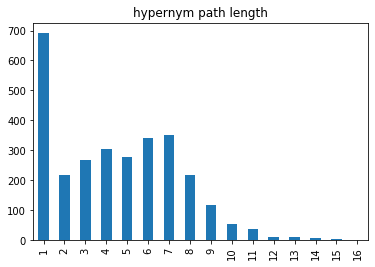

In [16]:
pd.value_counts([sum(x) for x in sense_vector.values()]).sort_index()\
    .plot.bar(title='hypernym path length')

## Save single-character hyperpath

In [25]:
from collections import defaultdict
char_sense_vector = defaultdict(lambda: {"synset": [], "vector": []})
for rid, row in singles.iterrows():
    char = row["word"]
    syn = row["synset"]
    char_sense_vector[char]["synset"].append(syn)
    char_sense_vector[char]["vector"].append(sense_vector[syn])

In [26]:
char_sense_vector = dict(char_sense_vector)

In [27]:
import pickle
with open(mesh.get_data_dir()/"bow/bow_monosyl_sense_vector.pkl", "wb") as fout:
    pickle.dump(char_sense_vector, fout)

In [28]:
char_sense_vector["我"]

KeyError: '我'

In [29]:
wn.synset("cat.n.01").hypernym_paths()

[[Synset('entity.n.01'),
  Synset('life_form.n.01'),
  Synset('animal.n.01'),
  Synset('chordate.n.01'),
  Synset('vertebrate.n.01'),
  Synset('mammal.n.01'),
  Synset('placental.n.01'),
  Synset('carnivore.n.01'),
  Synset('feline.n.01'),
  Synset('cat.n.01')]]